# 🧠🚗💥🚗PREDICTING THE LIKELIHOOD OF ROAD ACCIDENTS

Road accidents are a major cause of injury and loss of lives worldwide. They often result from speeding, distracted driving, poor road conditions, or failure to follow traffic rules. Raising awareness, improving road infrastructure, and practicing safe driving can significantly reduce these incidents and save lives. A critical measure in reducing these incidents is predicting the likelihood of of occurrence of accidents to preinform everyone.

`` ``

🚀The goal of this project is to **predict the likelihood of accidents on different types of roads**.

This project goes the extra mile to create a 🌐``web application`` that can predict the ``likelihood of road accidents`` given some important inputs.

The dataset for this project is sourced from [Kaggle](https://www.kaggle.com/competitions/playground-series-s5e10/overview).

``                                                                                                                          ``

The description of each data set used in the project is given below:

**train.csv** - the training dataset; accident_risk is the continuous [0-1] target ground truth.

**test.csv** - the test dataset; your objective is to predict the accident_risk for each row.

**sample_submission.csv** - a sample submission file in the correct format.

``                                                                                                                          ``

Some columns in the data set are:

**id**: a unique identification number given to each row

**road_type**: The type of road: ``urban`` or ``rural`` or ``highway``

**num_lanes**: The number of lanes on the road

**curvature**: The value of the curvature of the road

**speed_limit**: The approved speed limit for the road

**ligthing**: How lit the road was: ``daylight`` or ``dim`` or ``night``

**weather**: The weather condition: ``foggy`` or ``rainy`` or ``clear``

**road_signs_present**: Whether there were road signs present on the road

**public_road**: Whether it is a public road or not

**time_of_day**: The time of the day: ``morning`` or ``afternoon`` or ``evening``

**Holiday**: Whether it was a holiday or not

**school_season**: Whether it was a school season or not

**num_reported_accidents**: The number of reported accidents

**accident_risk**: The likelihood of an accident ocurring

`` ``

In this notebook, I:
1. Imported and cleaned the data 
2. Did exploratory data analysis to uncover insigths
3. Performed feature engineering to add some important features
4. Splitted the train data set in for training the machine learning model
4. Built and trained a machine learning model 
5. Made predictions on the test data set
6. Saved the predictions into a csv file


In [ ]:
# Import libraries for the project

# Data manipulation tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from scipy.optimize import minimize

# Data Preparation for machine learning
from sklearn.model_selection import train_test_split


# Machine Learning models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import root_mean_squared_error

# **💼LOAD DATASET**

In [ ]:
#Load the data sets into the notebook
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


# View the size of each data set
train.shape, test.shape

((517754, 14), (172585, 13))

In [ ]:
# Print first few rows of the train data set
train.head(5)

id road_type  num_lanes  curvature  speed_limit  lighting weather  \
0   0     urban          2       0.06           35  daylight   rainy   
1   1     urban          4       0.99           35  daylight   clear   
2   2     rural          4       0.63           70       dim   clear   
3   3   highway          4       0.07           35       dim   rainy   
4   4     rural          1       0.58           60  daylight   foggy   

   road_signs_present  public_road time_of_day  holiday  school_season  \
0               False         True   afternoon    False           True   
1                True        False     evening     True           True   
2               False         True     morning     True          False   
3                True         True     morning    False          False   
4               False        False     evening     True          False   

   num_reported_accidents  accident_risk  
0                       1           0.13  
1                       0           0.35  
2                       2           0.30  
3                       1           0.21  
4                       1           0.56

# **📊EXPLORATORY DATA ANALYSIS**

In [ ]:
# View information about the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [ ]:
# Printing the column names
train.columns

Index(['id', 'road_type', 'num_lanes', 'curvature', 'speed_limit', 'lighting',
       'weather', 'road_signs_present', 'public_road', 'time_of_day',
       'holiday', 'school_season', 'num_reported_accidents', 'accident_risk'],
      dtype='object')

In [ ]:
# View statistical information about the dataset
train.describe()

id      num_lanes      curvature    speed_limit  \
count  517754.000000  517754.000000  517754.000000  517754.000000   
mean   258876.500000       2.491511       0.488719      46.112575   
std    149462.849974       1.120434       0.272563      15.788521   
min         0.000000       1.000000       0.000000      25.000000   
25%    129438.250000       1.000000       0.260000      35.000000   
50%    258876.500000       2.000000       0.510000      45.000000   
75%    388314.750000       3.000000       0.710000      60.000000   
max    517753.000000       4.000000       1.000000      70.000000   

       num_reported_accidents  accident_risk  
count           517754.000000  517754.000000  
mean                 1.187970       0.352377  
std                  0.895961       0.166417  
min                  0.000000       0.000000  
25%                  1.000000       0.230000  
50%                  1.000000       0.340000  
75%                  2.000000       0.460000  
max                  7.000000       1.000000

In [ ]:
# checking for missing values
train.isna().sum()

id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

`There are no null values in the dataset`

## 📈UNIVARIATE ANALYSIS

### 🛣️Road type

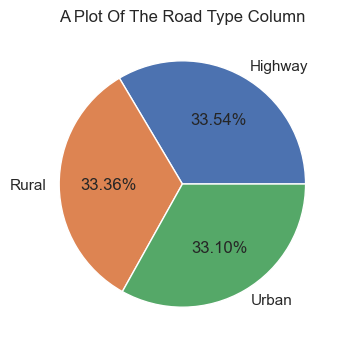

In [ ]:
# A plot of the road column
rt_labels = ['Highway', 'Rural', 'Urban']
plt.figure(figsize=(4,4))
plt.pie(train['road_type'].value_counts(),
        labels=rt_labels,
        autopct = '%1.2f%%')
plt.title("A plot of the road type column".title())
plt.show()

### ⛙Number of lanes

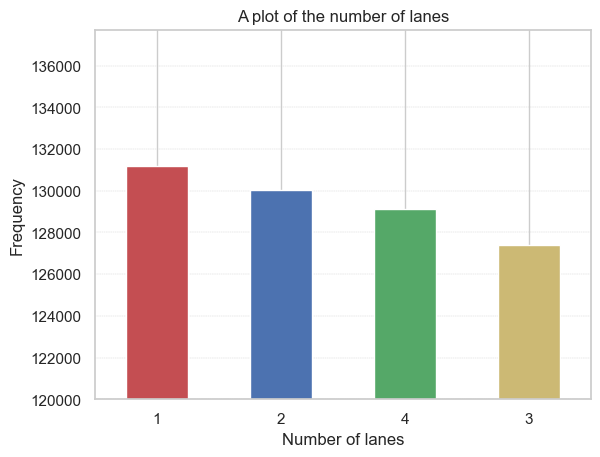

In [ ]:
# A plot of the num_lanes column
train['num_lanes'].value_counts().plot(kind='bar', color=['r','b','g','y'])
plt.title('A plot of the number of lanes')
plt.grid(axis='y', linewidth=0.3, linestyle='--')
plt.xticks(rotation=0)
plt.xlabel('Number of lanes')
plt.ylabel('Frequency')
plt.ylim(120000,)
plt.show()

### ⤴️Curvature

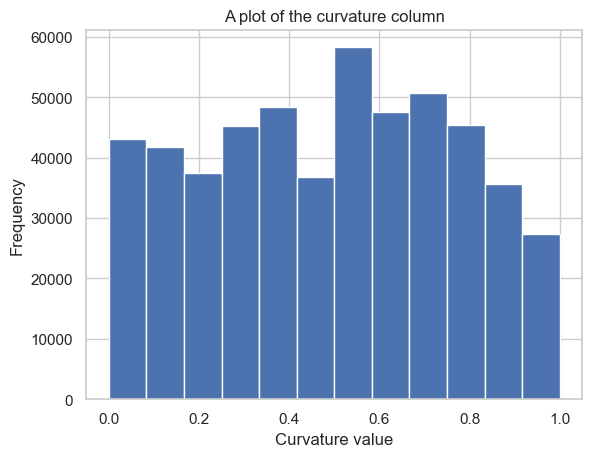

In [ ]:
# A plot fo the curvature column
plt.hist(data=train, x='curvature', bins=12)
plt.title("A plot of the curvature column")
plt.xlabel("Curvature value")
plt.ylabel('Frequency')
plt.show()

### ⚠️Speed Limit

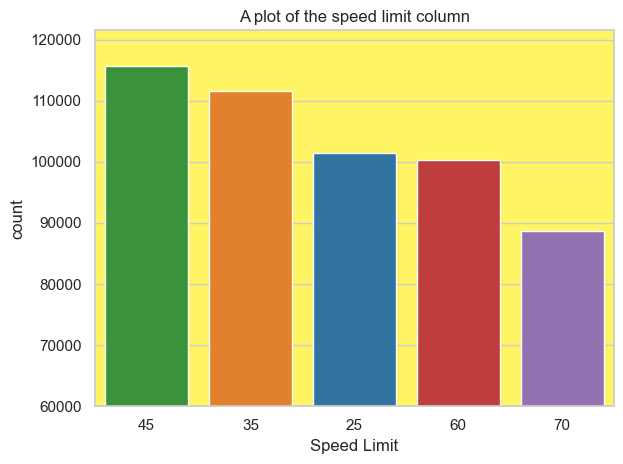

In [ ]:
# A plot of the speed limit column
# road_df['speed_limit'].value_counts().plot(kind='bar')
sns.countplot(x='speed_limit', 
              data=train,
              hue = 'speed_limit',
              palette='tab10',
              order=train['speed_limit'].value_counts().index, 
              legend=False)
plt.title('A plot of the speed limit column')
plt.xlabel('Speed Limit')


# set face color
speed = plt.gca()
speed.set_facecolor("#ffee009b")



plt.ylim(60000,)
plt.tight_layout()
plt.show()

### 🔆Lighting

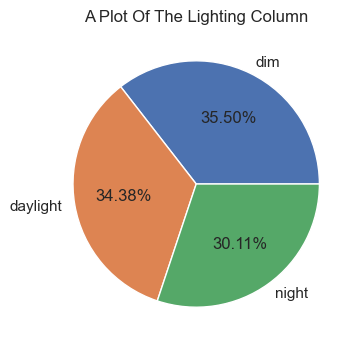

In [ ]:
# A plot of the ligthing column
lt_labels = ['dim', 'daylight', 'night']
plt.figure(figsize=(4,4))
plt.pie(train['lighting'].value_counts(),
        labels=lt_labels,
        autopct = '%1.2f%%')
plt.title("A plot of the lighting column".title())
plt.show()

### ☀️Weather

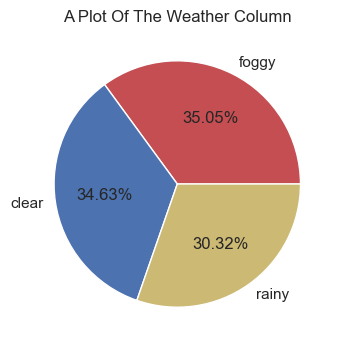

In [ ]:
# A plot of the weather column
wth_labels = ['foggy', 'clear', 'rainy']
plt.figure(figsize=(4,4))
plt.pie(train['weather'].value_counts(),
        labels=wth_labels,
        colors = ['r', 'b', 'y'],
        autopct = '%1.2f%%')
plt.title("A plot of the weather column".title())
plt.show()

### 🚫Road Signs

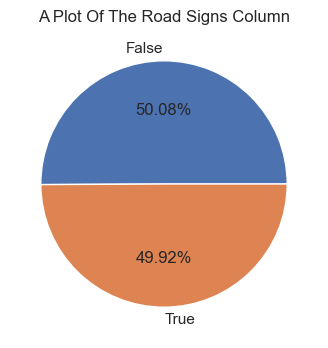

In [ ]:
# A plot of the road signs column
rs_labels = ['False', 'True']
plt.figure(figsize=(4,4))
plt.pie(train['road_signs_present'].value_counts(),
        labels=rs_labels,
        autopct = '%1.2f%%')
plt.title("A plot of the road signs column".title())
plt.show()

### 🛣️Public Road

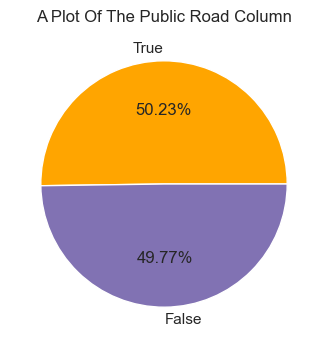

In [ ]:
# A plot of the public road column
prd_labels = train['public_road'].unique()
plt.figure(figsize=(4,4))
plt.pie(train['public_road'].value_counts(),
        labels=prd_labels,
        colors = ['orange', 'm'],
        autopct = '%1.2f%%')
plt.title("A plot of the public road column".title())
plt.show()

### 🌅🌇Time of day

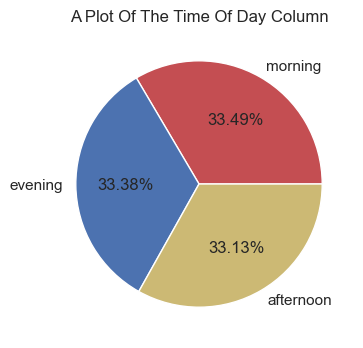

In [ ]:
# A plot of the tiime of the day
tod_labels = ['morning', 'evening', 'afternoon']
plt.figure(figsize=(4,4))
plt.pie(train['time_of_day'].value_counts(),
        labels=tod_labels,
        colors = ['r', 'b', 'y'],
        autopct = '%1.2f%%')
plt.title("A plot of the time of day column".title())
plt.show()

### 🎉Holiday

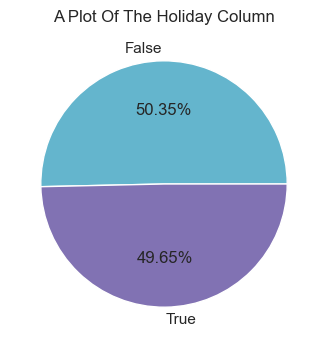

In [ ]:
# The number of times that it was a holiday
hol_labels = train['holiday'].unique().tolist()
plt.figure(figsize=(4,4))
plt.pie(train['holiday'].value_counts(),
        labels=hol_labels,
        colors = ['c', 'm'],
        autopct = '%1.2f%%')
plt.title("A plot of the Holiday column".title())
plt.show()

### 📚School Season

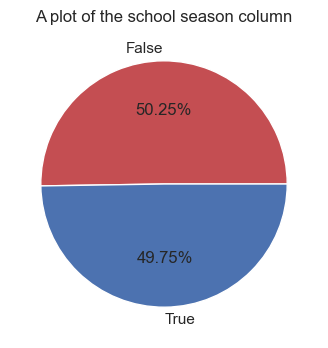

In [ ]:
# The number of times thd_at it was a school season
my_labels = sorted(train['school_season'].unique().tolist())
plt.figure(figsize=(4,4))
plt.pie(train['school_season'].value_counts(),
        labels=my_labels,
        colors = ['r', 'b'],
        autopct = '%1.2f%%')
plt.title("A plot of the school season column")
plt.show()

### 🔢🚗💥🚗Number of Accidents

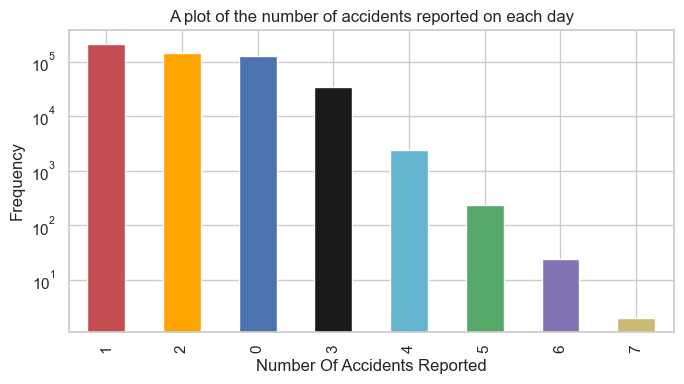

In [ ]:
# A plot of the number of accidents that happened
color_code = ['r', 'orange', 'b', 'k', 'c', 'g', 'm', 'y']
plt.figure(figsize=(7,4))
train['num_reported_accidents'].value_counts().plot(kind='bar', color=color_code)
plt.title('A plot of the number of accidents reported on each day')
plt.xlabel('Number Of Accidents Reported')
plt.yscale('log')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
# Printing statiscal values about the num_reported_accidents column
pd.DataFrame(train['num_reported_accidents'].describe())

num_reported_accidents
count           517754.000000
mean                 1.187970
std                  0.895961
min                  0.000000
25%                  1.000000
50%                  1.000000
75%                  2.000000
max                  7.000000

**It can be seen from the analysis above that, 1 accident is mostly reported each day.**
**Also, most accidents reported daily are from 0-2.**

* The next few cells aim at discovering some insights into the **causes of the accidents.**

### 🎲🚗💥🚗Accident Risk

In [ ]:
# Printing statistical variables of the accident risk column
pd.DataFrame(train['accident_risk'].describe())

accident_risk
count  517754.000000
mean        0.352377
std         0.166417
min         0.000000
25%         0.230000
50%         0.340000
75%         0.460000
max         1.000000

**The analysis above shows that the probablity of accidents occurring is relavitely lower with a 50% value of 0.34 and a mean value of 0.35.**

## 📊📈🔢MULTIVARIATE ANALYSIS

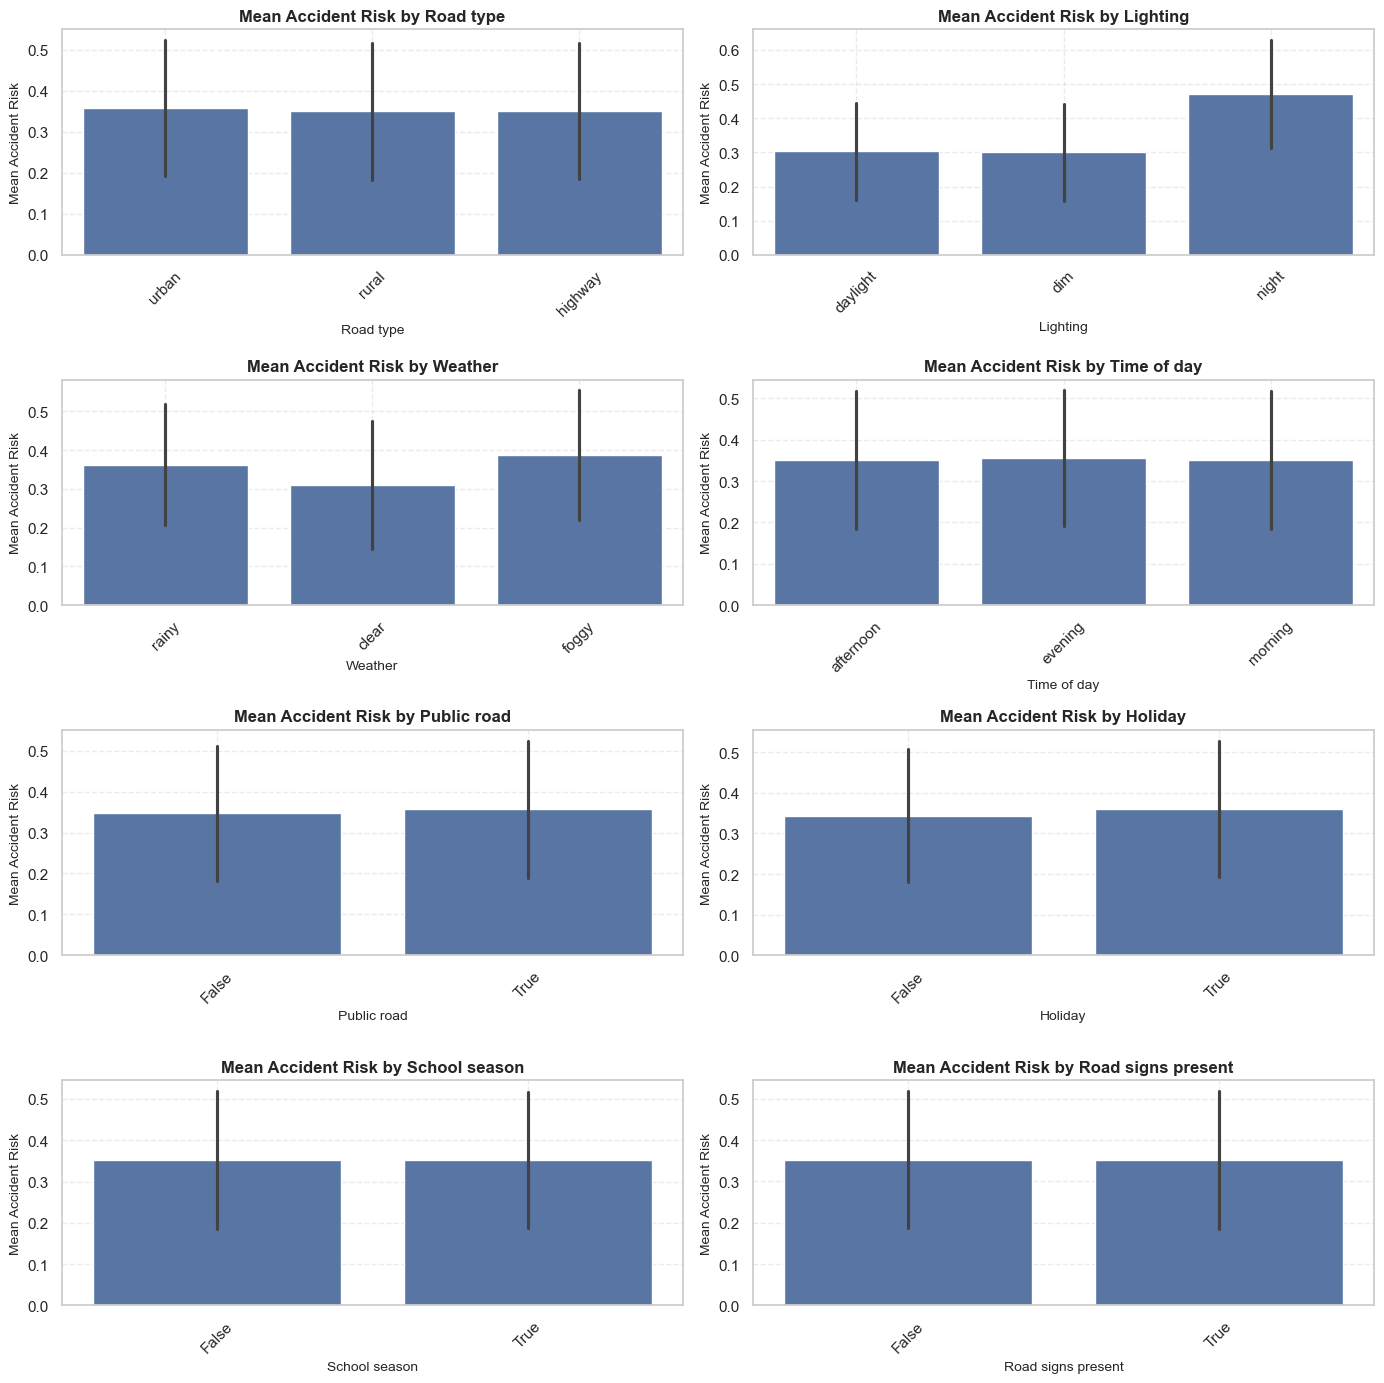

In [ ]:
### Bar plots of mean accident risk by categorical features

sns.set_theme(style="whitegrid")

cat_features = [
    'road_type', 'lighting', 'weather', 'time_of_day',
    'public_road', 'holiday', 'school_season', 'road_signs_present'
]

fig, axes = plt.subplots(4, 2, figsize=(14, 14))
axes = axes.flatten()

for i, col in enumerate(cat_features):
    sns.barplot(
        x=col,
        y='accident_risk',
        data=train,
        estimator='mean',
        errorbar='sd',
        ax=axes[i]
    )
    axes[i].set_title(f"Mean Accident Risk by {col.replace('_', ' ').capitalize()}", fontsize=12, weight='bold')
    axes[i].set_xlabel(col.replace('_', ' ').capitalize(), fontsize=10)
    axes[i].set_ylabel("Mean Accident Risk", fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

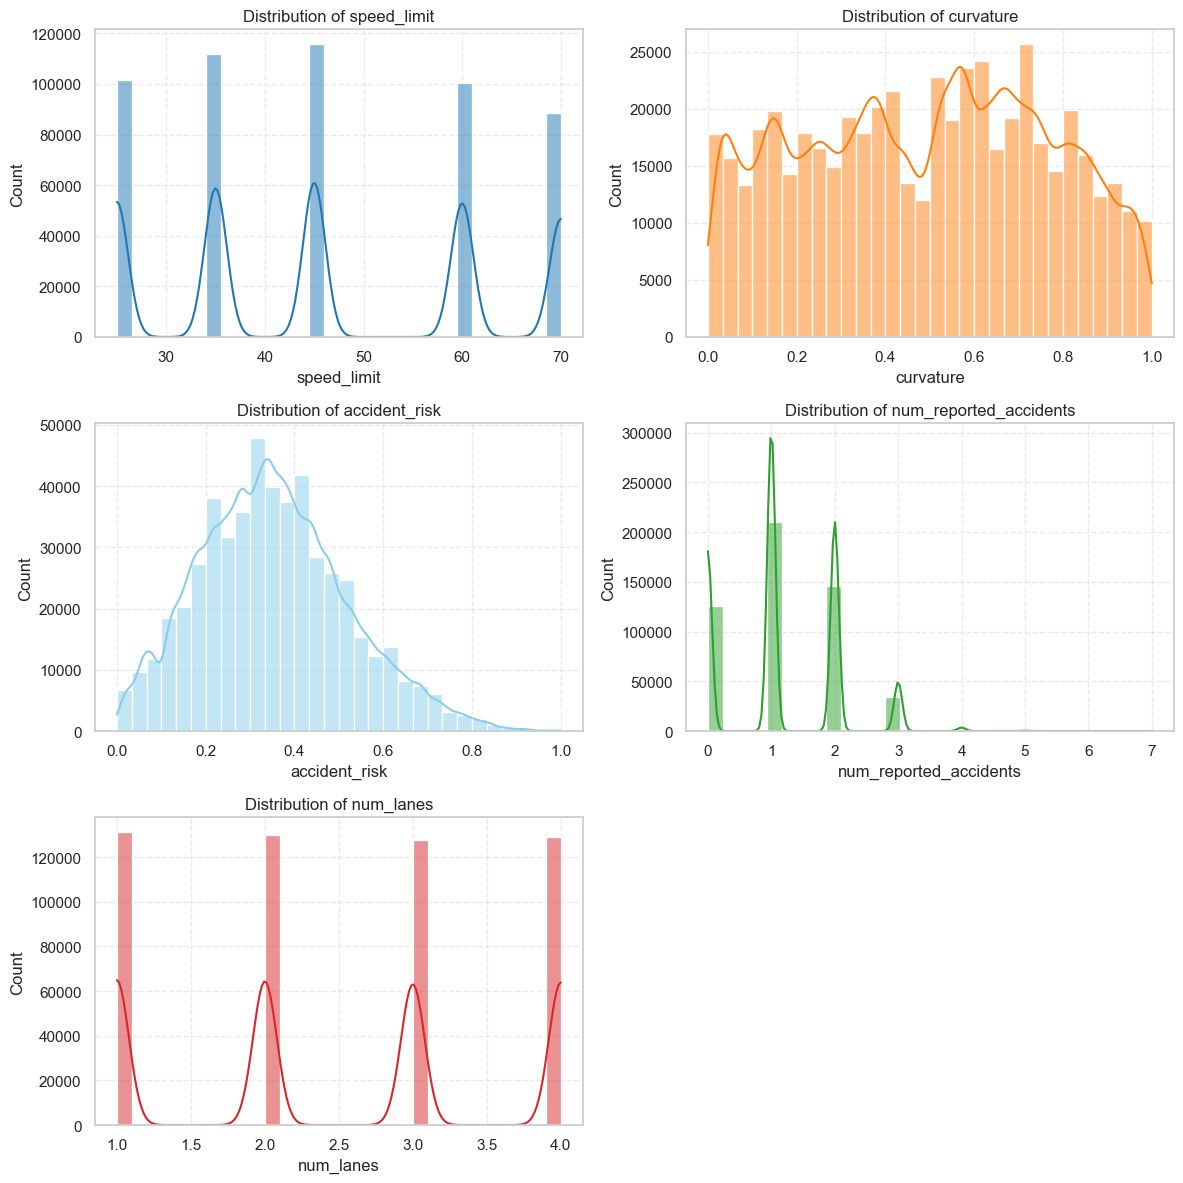

In [ ]:
### Histograms of numerical feature distributions

num_features = [
    'speed_limit', 'curvature', 'accident_risk',
    'num_reported_accidents', 'num_lanes'
]

colors = ['#1f77b4', '#ff7f0e', '#87ceeb', '#2ca02c', '#d62728']

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.histplot(train[col], bins=30, kde=True, color=colors[i], ax=axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].grid(True, linestyle='--', alpha=0.4)

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

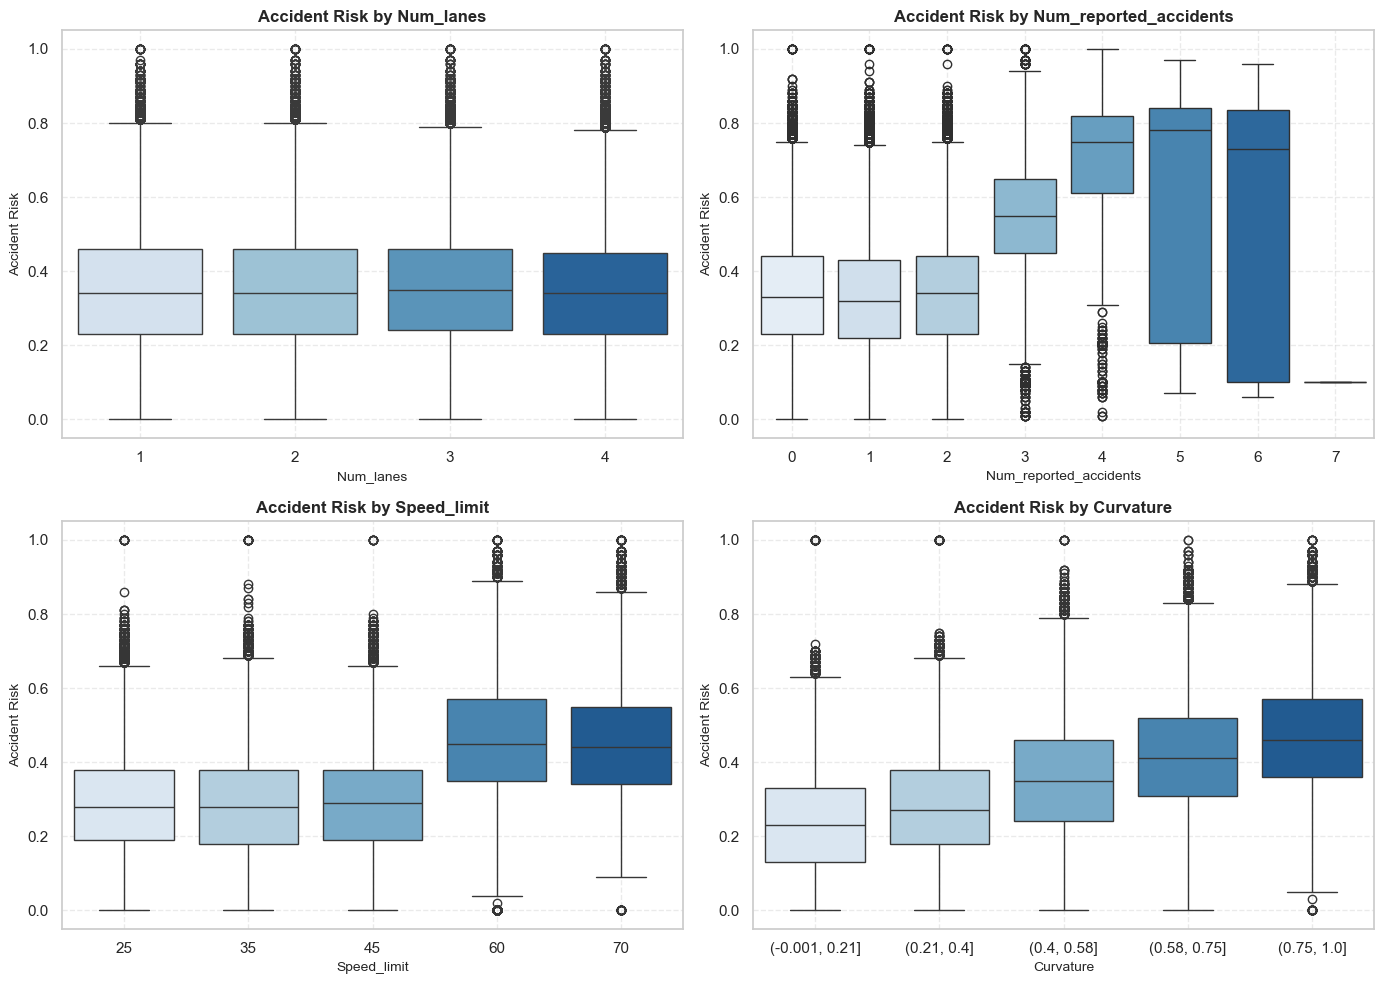

In [ ]:
### Boxplots of accident risk for discrete and binned continuous features

sns.set_theme(style="whitegrid")

discrete_features = ['num_lanes', 'num_reported_accidents', 'speed_limit']
continuous_features = ['curvature']
all_features = discrete_features + continuous_features

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(all_features):
    if col in continuous_features:
        # Bin continuous feature into 5 quantiles
        train[f'{col}_bin'] = pd.qcut(train[col], q=5, duplicates='drop')
        x_col = f'{col}_bin'
    else:
        x_col = col  # Use discrete feature as is

    sns.boxplot(
        x=x_col,
        y='accident_risk',
        data=train,
        ax=axes[i],
        palette="Blues"
    )

    axes[i].set_title(f"Accident Risk by {col.capitalize()}", fontsize=12, weight='bold')
    axes[i].set_xlabel(col.capitalize(), fontsize=10)
    axes[i].set_ylabel("Accident Risk", fontsize=10)
    axes[i].tick_params(axis='x')
    axes[i].grid(True, linestyle='--', alpha=0.4)

for j in range(len(all_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 🛣️⛙ROAD TYPE AND NUMBER OF LANES

In [ ]:
# Making a copy of the dataset
road_df = train.copy()
road_df.head(3)

id road_type  num_lanes  curvature  speed_limit  lighting weather  \
0   0     urban          2       0.06           35  daylight   rainy   
1   1     urban          4       0.99           35  daylight   clear   
2   2     rural          4       0.63           70       dim   clear   

   road_signs_present  public_road time_of_day  holiday  school_season  \
0               False         True   afternoon    False           True   
1                True        False     evening     True           True   
2               False         True     morning     True          False   

   num_reported_accidents  accident_risk   curvature_bin  
0                       1           0.13  (-0.001, 0.21]  
1                       0           0.35     (0.75, 1.0]  
2                       2           0.30    (0.58, 0.75]

In [ ]:
# Printing all the road types present in the dataset
road_typ = road_df['road_type'].unique()
road_typ

array(['urban', 'rural', 'highway'], dtype=object)

In [ ]:
# selecting the rows that are each of the road types
urban_df = train[road_df['road_type'] == "urban"]
rural_df = train[road_df['road_type'] == "rural"]
highway_df = train[road_df['road_type'] == "highway"]

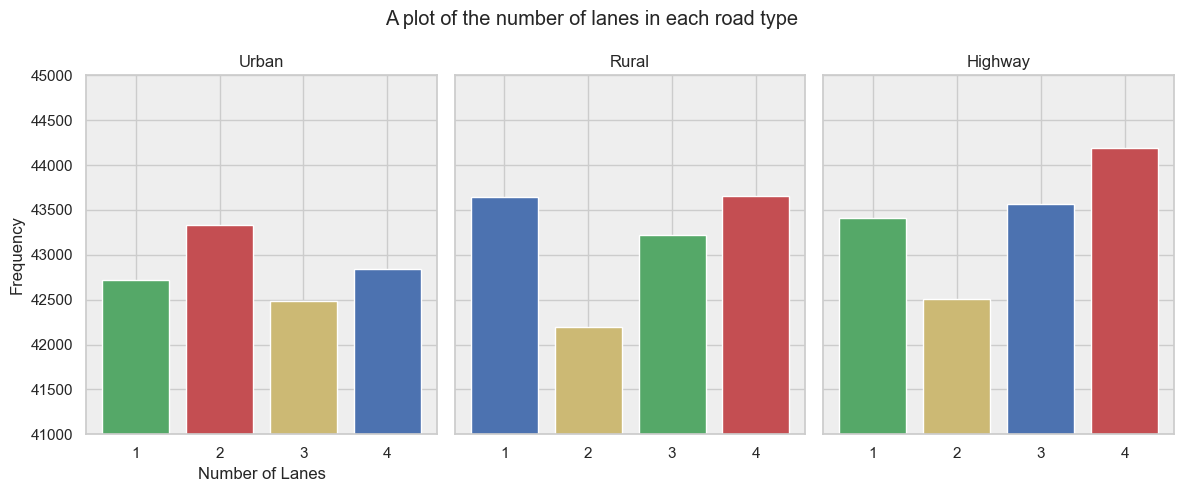

In [ ]:
# Plotting the number of lanes for each road type for all road types


# Using subplots 
fig, axes = plt.subplots(1, 3, figsize=(12,5), sharey='all')
fig.suptitle("A plot of the number of lanes in each road type")
for ax in axes:
    ax.set_ylim(41000,45000)
    ax.set_facecolor("#EEEEEEF8")


# Urban
axes[0].bar(urban_df['num_lanes'].unique(), urban_df['num_lanes'].value_counts(), color = ['r', 'b', 'g', 'y'])
axes[0].set_title('Urban')
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Number of Lanes')


# Rural 
axes[1].bar(rural_df['num_lanes'].unique(), rural_df['num_lanes'].value_counts(), color = ['r', 'b', 'g', 'y'])
axes[1].set_title('Rural')


# Highway
axes[2].bar(highway_df['num_lanes'].unique(), highway_df['num_lanes'].value_counts(), color = ['r', 'b', 'g', 'y'])
axes[2].set_title('Highway')


plt.tight_layout(rect=[0,0,1,1])
plt.show()

### Road type, curvature and num of reported accidents

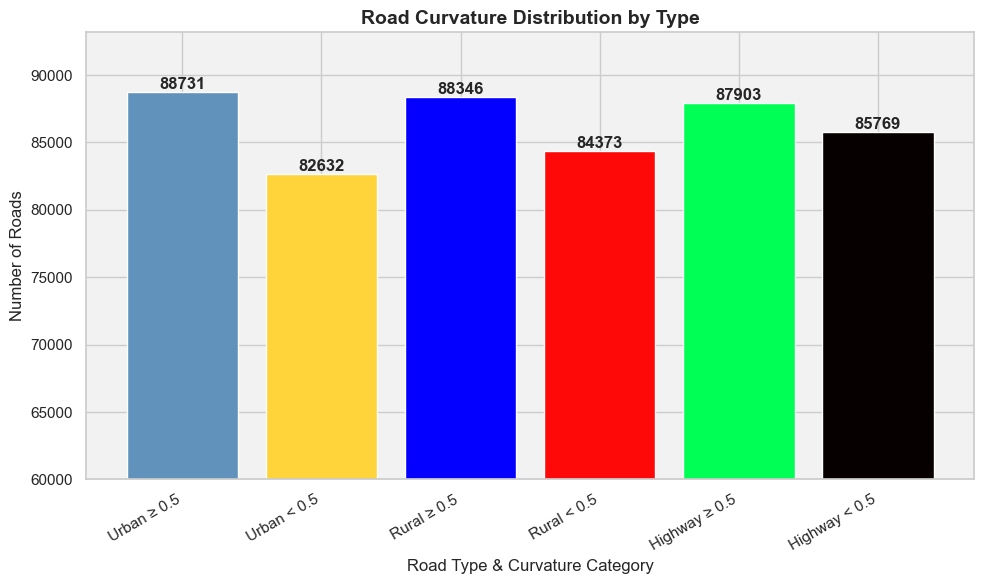

In [ ]:
# create a copy of the data set
road_copy = road_df.copy()

# Add a new column that prints True if curvature is >= 0.5 and False if < 0.5
road_copy['curvature_0.5'] = road_copy['curvature'].apply(lambda x: x>=0.5)

# Road type and curvature type
# Urban
urban_df_5 = road_copy[(road_copy['road_type'] == 'urban') & (road_copy['curvature'] >= 0.5)]
urban_df_less_5 = road_copy[(road_copy['road_type'] == 'urban') & (road_copy['curvature'] < 0.5)]

# Rural
rural_df_5 = road_copy[(road_copy['road_type'] == 'rural') & (road_copy['curvature'] >= 0.5)]
rural_df_less_5 = road_copy[(road_copy['road_type'] == 'rural') & (road_copy['curvature'] < 0.5)]

# Highway
highway_df_5 = road_copy[(road_copy['road_type'] == 'highway') & (road_copy['curvature'] >= 0.5)]
highway_df_less_5 = road_copy[(road_copy['road_type'] == 'highway') & (road_copy['curvature'] < 0.5)]


# Create a plot

# Prepare data
labels = [
    'Urban ≥ 0.5', 'Urban < 0.5',
    'Rural ≥ 0.5', 'Rural < 0.5',
    'Highway ≥ 0.5', 'Highway < 0.5'
]

values = [
    len(urban_df_5),
    len(urban_df_less_5),
    len(rural_df_5),
    len(rural_df_less_5),
    len(highway_df_5),
    len(highway_df_less_5)
]

# Create plot
plt.figure(figsize=(10,6))
bars = plt.bar(labels, values, color=["#6092BB", '#FFD43B', "#0400FF", "#FF0808", "#00FF55FF", "#070000FF"])

# Decoration
plt.title('Road Curvature Distribution by Type', fontsize=14, weight='bold')
plt.xlabel('Road Type & Curvature Category', fontsize=12)
plt.ylabel('Number of Roads', fontsize=12)
plt.ylim(60000,)
plt.gca().set_facecolor('#f2f2f2')  # soft grey background
plt.xticks(rotation=30, ha='right')

# Add values above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, f'{int(yval)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


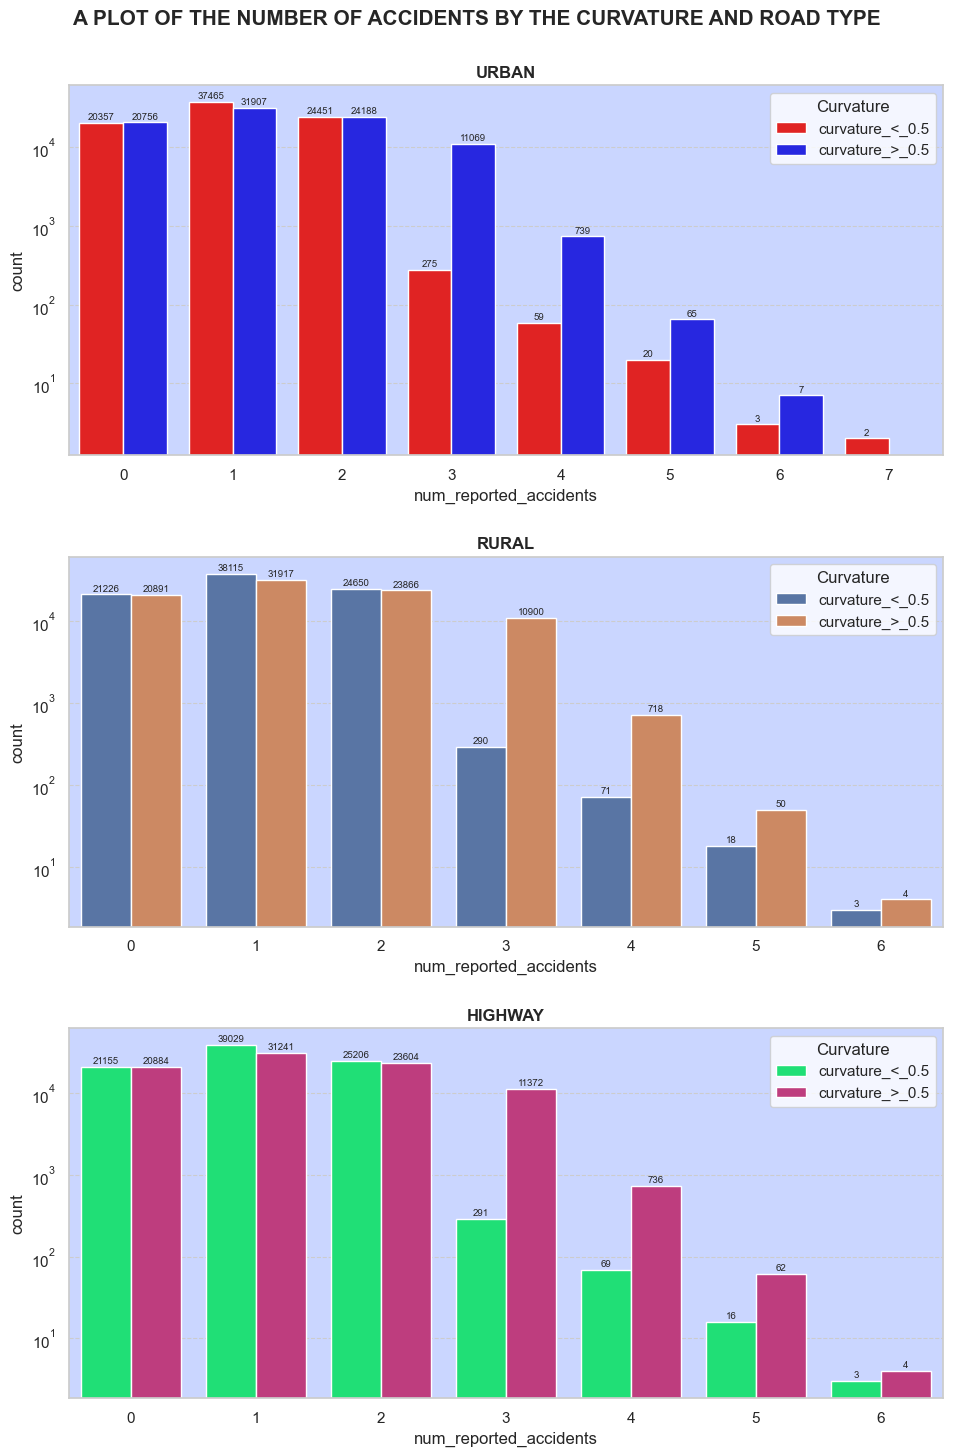

In [ ]:
# Create a plot of the road type, curvature and number of accidents

# selecting road type of each road category and assigning as a data set
new_urban_df = road_copy[road_copy['road_type'] == 'urban']
new_rural_df = road_copy[road_copy['road_type'] == 'rural']
new_highway_df = road_copy[road_copy['road_type'] == 'highway']

# Create subplots of the 3 data sets
fig, axes = plt.subplots(3,1, figsize=(10,15))

# title 
fig.suptitle("A plot of the number of accidents by the curvature and road type".upper(), fontsize=15, weight='bold')

# Subplot of the new_urban_df
sns.countplot(data=new_urban_df, x='num_reported_accidents', hue='curvature_0.5',
              palette=["#FF0404", "#0808FF"],
              ax=axes[0])
axes[0].set_title('URBAN', weight='bold')


# Subplot of the new_rural_df
sns.countplot(data=new_rural_df, x='num_reported_accidents', hue='curvature_0.5', ax=axes[1])
axes[1].set_title('RURAL', weight='bold')


# Subplot of the new_highway_df
sns.countplot(data=new_highway_df, x='num_reported_accidents', hue='curvature_0.5', palette=["#00FF73", "#D4277E"], ax=axes[2])
axes[2].set_title('HIGHWAY', weight='bold')


# Creating a for lop to specify the legend, grid, background color, and set scale of the y-axis to log
for ax in axes:
    ax.legend(title='Curvature', labels=['curvature_<_0.5', 'curvature_>_0.5'])
    ax.grid(axis='y', linestyle='--', linewidth=0.8)
    ax.set_yscale('log')
    ax.set_facecolor("#7595ff61")
    
    # Adding data labels to each of the bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=1, fontsize=7, fontweight='light')
        
        
# Ensuring that the plots are not overlapping each other       
plt.tight_layout(pad=2.0)
plt.show()

### Speed limit and Number of Accidents reported

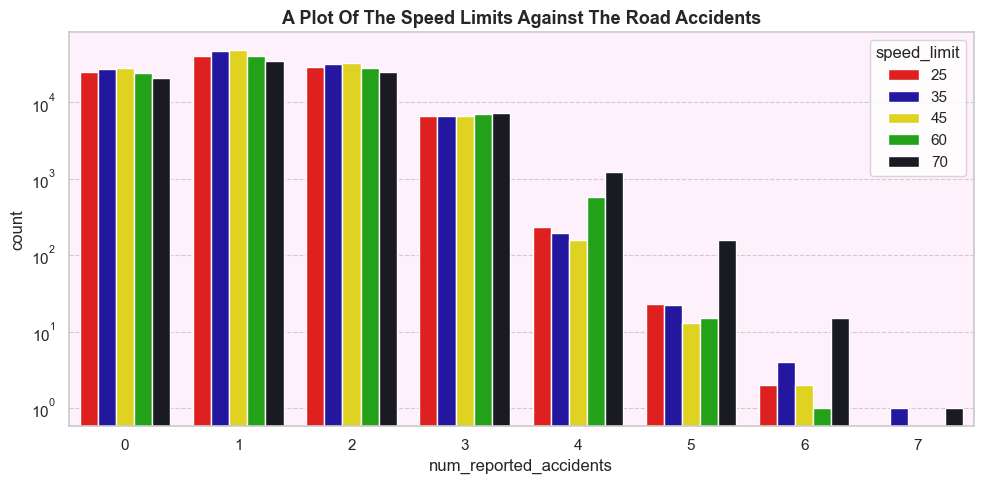

In [ ]:
# A plot of speed limit against the number of accidents reported
 
plt.figure(figsize=(10,5))
sns.countplot(data=road_df, x='num_reported_accidents', hue='speed_limit',
              palette=["#ff0000","#1200b6", "#ffee00", "#10b801",
                       "#171924a0"])
plt.title("A plot of the Speed Limits against the road accidents".title(), fontsize=13, weight='bold')
plt.yscale('log')
plt.gca().set_facecolor("#ffa7e926")
plt.grid(axis='y', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

**From the plot above, it uncovers that the higher the speed limit, the more accidents occur.**

### Number of accidents and road signs

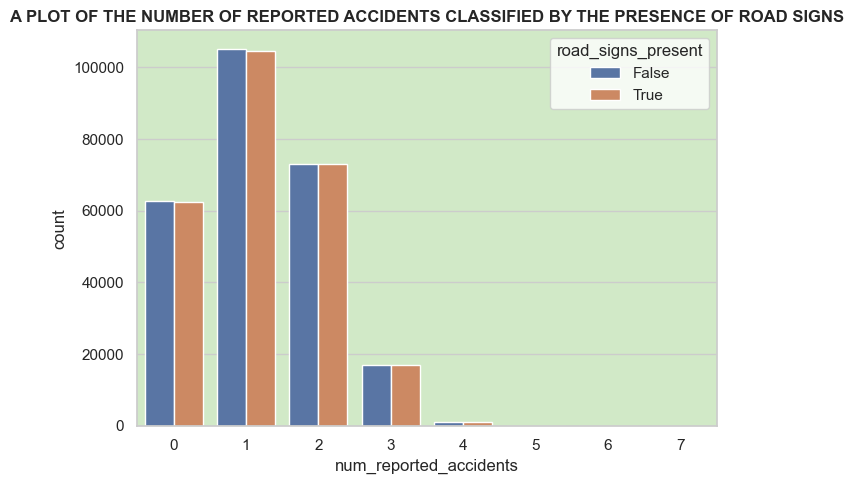

In [ ]:
# A plot of the number of accidents and road signs
plt.figure(figsize=(7,5))
sns.countplot(data=road_df, x='num_reported_accidents', hue='road_signs_present', palette='deep')
plt.title('A plot of the number of reported accidents classified by the presence of road signs'.upper(), fontsize=12, weight='bold')
plt.gca().set_facecolor("#c2e2b5c0")
plt.tight_layout()
plt.show()

### Lighting and number of accidents

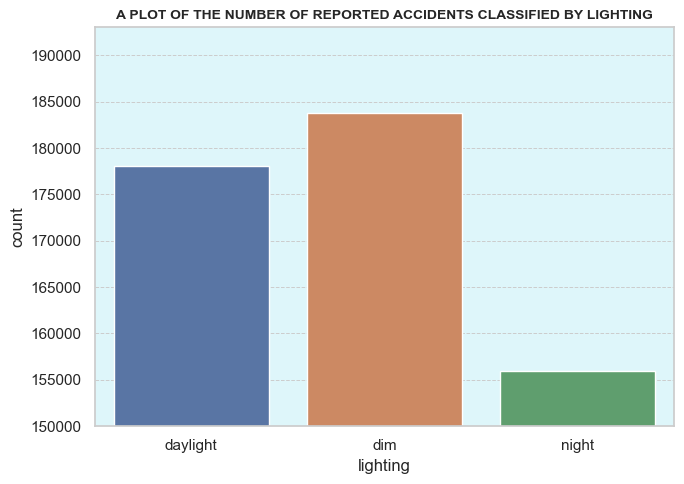

In [ ]:
# A plot of the number of accidents classified by the lighting

plt.figure(figsize=(7,5))
sns.countplot(data=road_df, x='lighting', hue='lighting', palette='deep')
plt.title('A plot of the number of reported accidents classified by lighting'.upper(), fontsize=10, weight='bold')
plt.ylim(150000)
plt.grid(axis='y', linewidth=0.7, linestyle='--')
plt.gca().set_facecolor("#cef3f8ac")
plt.tight_layout()
plt.show()

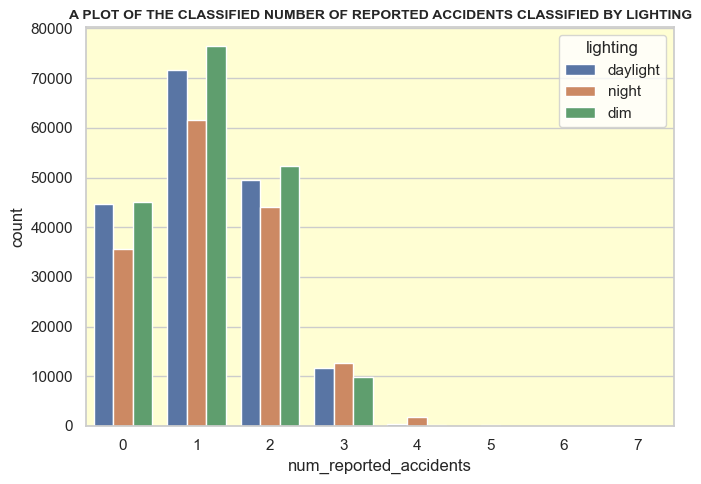

In [ ]:
# A plot of the number of accidents classified by the lighting

plt.figure(figsize=(7,5))
sns.countplot(data=road_df, x='num_reported_accidents', hue='lighting', palette='deep')
plt.title('A plot of the classified number of reported accidents classified by lighting'.upper(), fontsize=10, weight='bold')
plt.gca().set_facecolor("#fffebfad")
plt.tight_layout()
plt.show()

In [ ]:
## Weather and number of accidents

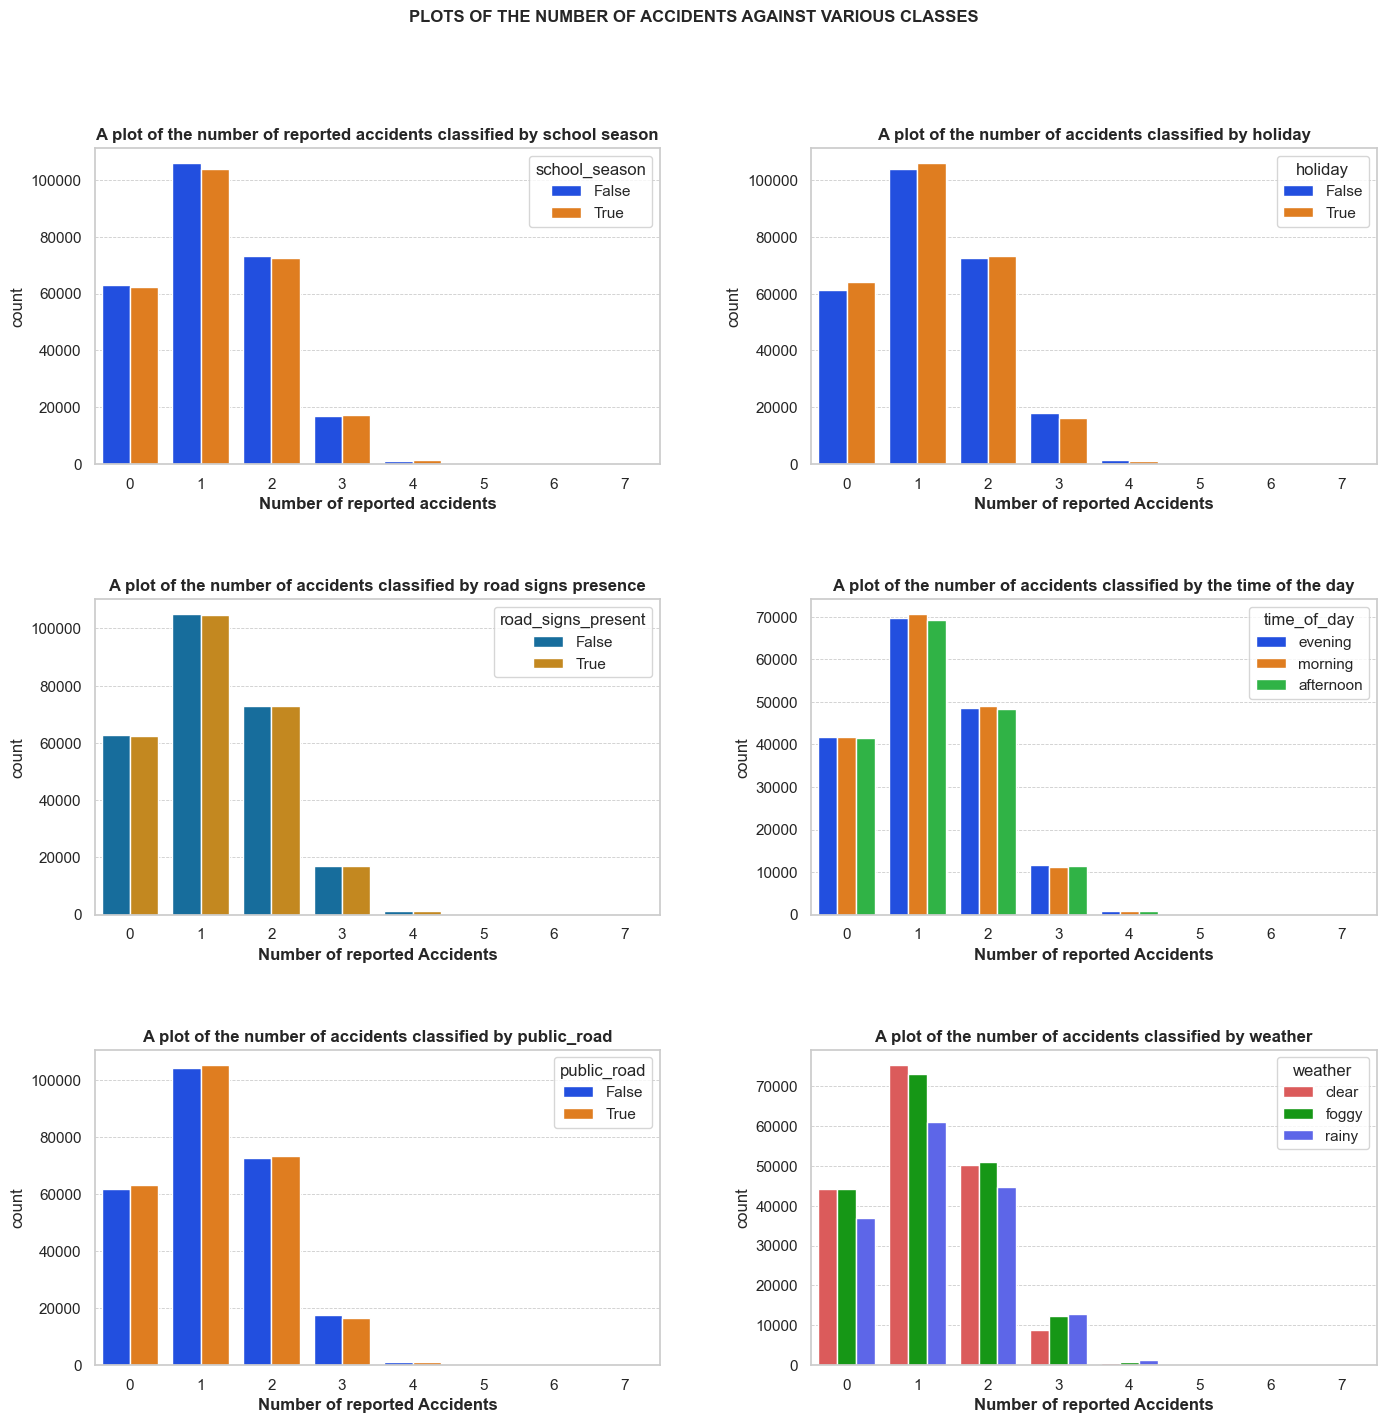

In [ ]:
# A plot of the number of accidents and the school season using subplots

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
fig.suptitle('Plots of the number of accidents against various classes'.upper(), fontsize=12, weight='bold')

sns.countplot(data=road_df, x='num_reported_accidents', hue='school_season', palette='bright', ax=axes[0,0])
axes[0,0].set_title('A plot of the number of reported accidents classified by school season', weight='bold')
axes[0,0].set_xlabel('Number of reported accidents', weight='bold')
axes[0,0].grid(axis='y', linestyle='--', linewidth=0.6)

sns.countplot(data=road_df, x='num_reported_accidents', hue='holiday', ax=axes[0,1], palette='bright')
axes[0,1].set_title('A plot of the number of accidents classified by holiday', weight='bold')
axes[0,1].set_xlabel('Number of reported Accidents', weight='bold')
axes[0,1].grid(axis='y', linestyle='--', linewidth=0.6)


sns.countplot(data=road_df, x='num_reported_accidents', hue='road_signs_present', ax=axes[1,0], palette='colorblind')
axes[1,0].set_title('A plot of the number of accidents classified by road signs presence', weight='bold')
axes[1,0].set_xlabel('Number of reported Accidents', weight='bold')
axes[1,0].grid(axis='y', linestyle='--', linewidth=0.6)


sns.countplot(data=road_df, x='num_reported_accidents', hue='time_of_day', ax=axes[1,1], palette='bright')
axes[1,1].set_title('A plot of the number of accidents classified by the time of the day', weight='bold')
axes[1,1].set_xlabel('Number of reported Accidents', weight='bold')
axes[1,1].grid(axis='y', linestyle='--', linewidth=0.6)


sns.countplot(data=road_df, x='num_reported_accidents', hue='public_road', ax=axes[2,0], palette='bright')
axes[2,0].set_title('A plot of the number of accidents classified by public_road', weight='bold')
axes[2,0].set_xlabel('Number of reported Accidents', weight='bold')
axes[2,0].grid(axis='y', linestyle='--', linewidth=0.6)

sns.countplot(data=road_df, x='num_reported_accidents', hue='weather', ax=axes[2,1], palette=["#f04646", "#00ac00d3", "#4652ff"])
axes[2,1].set_title('A plot of the number of accidents classified by weather', weight='bold')
axes[2,1].set_xlabel('Number of reported Accidents', weight='bold')
axes[2,1].grid(axis='y', linestyle='--', linewidth=0.6)


plt.tight_layout(pad=4)
plt.show()

### Data preprocessing and feature engineering

**Optimize feature weights for maximum accident risk correlation**

In [ ]:

def neg_corr(weights, df):
    w_curv, w_light, w_weather, w_speed, w_acc = weights

    risk = (
        w_curv   * df['curvature'] +
        w_light  * (df['lighting'] == "night").astype(int) +  # lighting == "night"
        w_weather* (df["weather"] != "clear").astype(int) +     # weather != "clear"
        w_speed  * (df['speed_limit'] >= 60).astype(int) +
        w_acc    * (df['num_reported_accidents'] > 2).astype(int)
    )

    return -np.corrcoef(risk, df['accident_risk'])[0, 1]

bounds = [(0, 1)] * 5

np.random.seed(42)
random_start = np.random.rand(5)

result = minimize(
    neg_corr,
    random_start,
    args=(train,),
    bounds=bounds
)

best_weights = result.x

feature_names = ['curvature', 'lighting', 'weather', 'speed_limit', 'num_reported_accidents']
print("Coefficients optimaux :")
for name, w in zip(feature_names, best_weights):
    print(f"{name}: {w:.3f}")

final_corr = -neg_corr(best_weights, train)
print(f"\nCorrelation : {final_corr:.3f}")

Coefficients optimaux :
curvature: 0.999
lighting: 0.622
weather: 0.305
speed_limit: 0.611
num_reported_accidents: 0.317

Correlation : 0.937


**normalize weights**

In [ ]:
best_weights = np.array([0.999, 0.622, 0.305, 0.611, 0.317])
normalized_weights = np.round(best_weights / 3, 1)

for name, w in zip(['curvature','lighting','weather','speed_limit','num_reported_accidents'], normalized_weights):
    print(f"{name}: {w}")

curvature: 0.3
lighting: 0.2
weather: 0.1
speed_limit: 0.2
num_reported_accidents: 0.1


**Base Risk Feature**

In [ ]:
def compute_base_risk(df):
    return (
        0.3 * df["curvature"] +
        0.2 * (df["lighting"] == "night").astype(int) +
        0.1 * (df["weather"] != "clear").astype(int) +
        0.2 * (df["speed_limit"] >= 60).astype(int) +
        0.1 * (np.array(df["num_reported_accidents"]) > 2).astype(int)
    )

train["base_risk"] = compute_base_risk(train)
test["base_risk"] = compute_base_risk(test)

**Feature Encoding**

In [ ]:
categorical_cols = ['weather','road_type','time_of_day']
train = pd.get_dummies(train, columns=categorical_cols, drop_first=False)
test = pd.get_dummies(test, columns=categorical_cols, drop_first=False)

lighting_mapping = {'daylight': 0, 'dim': 0, 'night': 1}
train['lighting_encoded'] = train['lighting'].map(lighting_mapping)
test['lighting_encoded'] = test['lighting'].map(lighting_mapping)

binary_cols = ['holiday','school_season','road_signs_present','public_road']
for col in binary_cols:
    train[col] = train[col].astype(int)
    test[col] = test[col].astype(int)

**Remove ID Column**

In [ ]:
test_ids = test['id']

train = train.drop(columns=['id'])
test = test.drop(columns=['id'])

**Boxplots of accident risk vs engineered features**

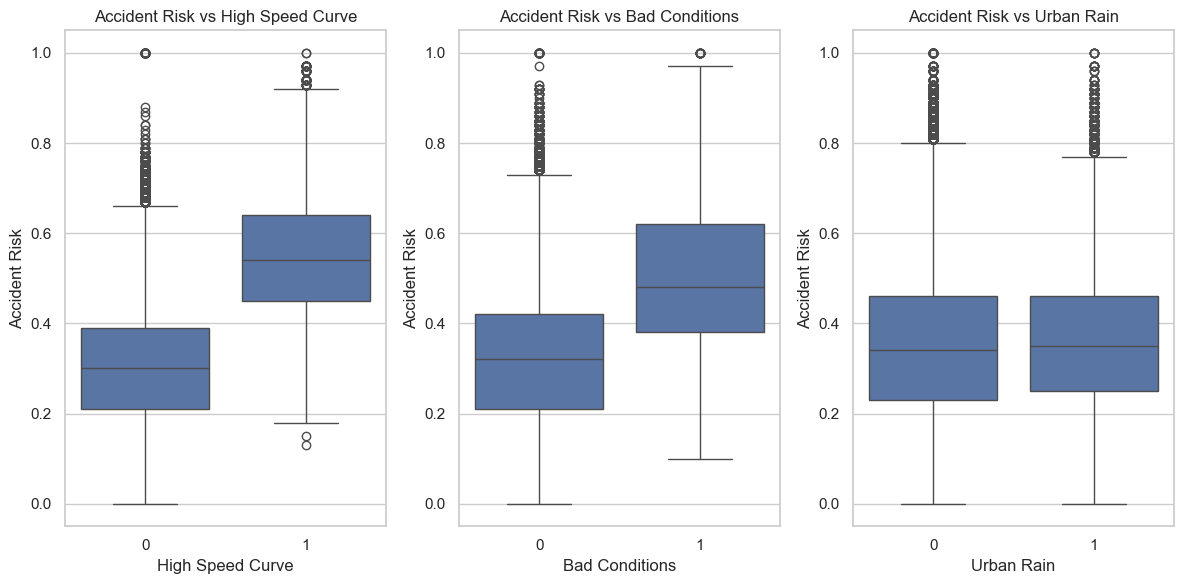

In [ ]:
binary_features = {
    'High Speed Curve': (train['speed_limit'] >= 60) & (train['curvature'] > 0.5),
    'Bad Conditions': ((train.get('weather_rainy',0) == 1) | (train.get('weather_foggy',0) == 1)) & (train['lighting_encoded'] == 1),
    'Urban Rain': (train.filter(like='road_type_urban').max(axis=1) == 1) & (train.get('weather_rainy',0) == 1),
}

plt.figure(figsize=(12,6))

for i, (name, feature) in enumerate(binary_features.items(), 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=feature.astype(int), y=train['accident_risk'])
    plt.title(f"Accident Risk vs {name}")
    plt.xlabel(name)
    plt.ylabel("Accident Risk")

plt.tight_layout()
plt.show()

**Scatter plots of accident risk vs combined features**

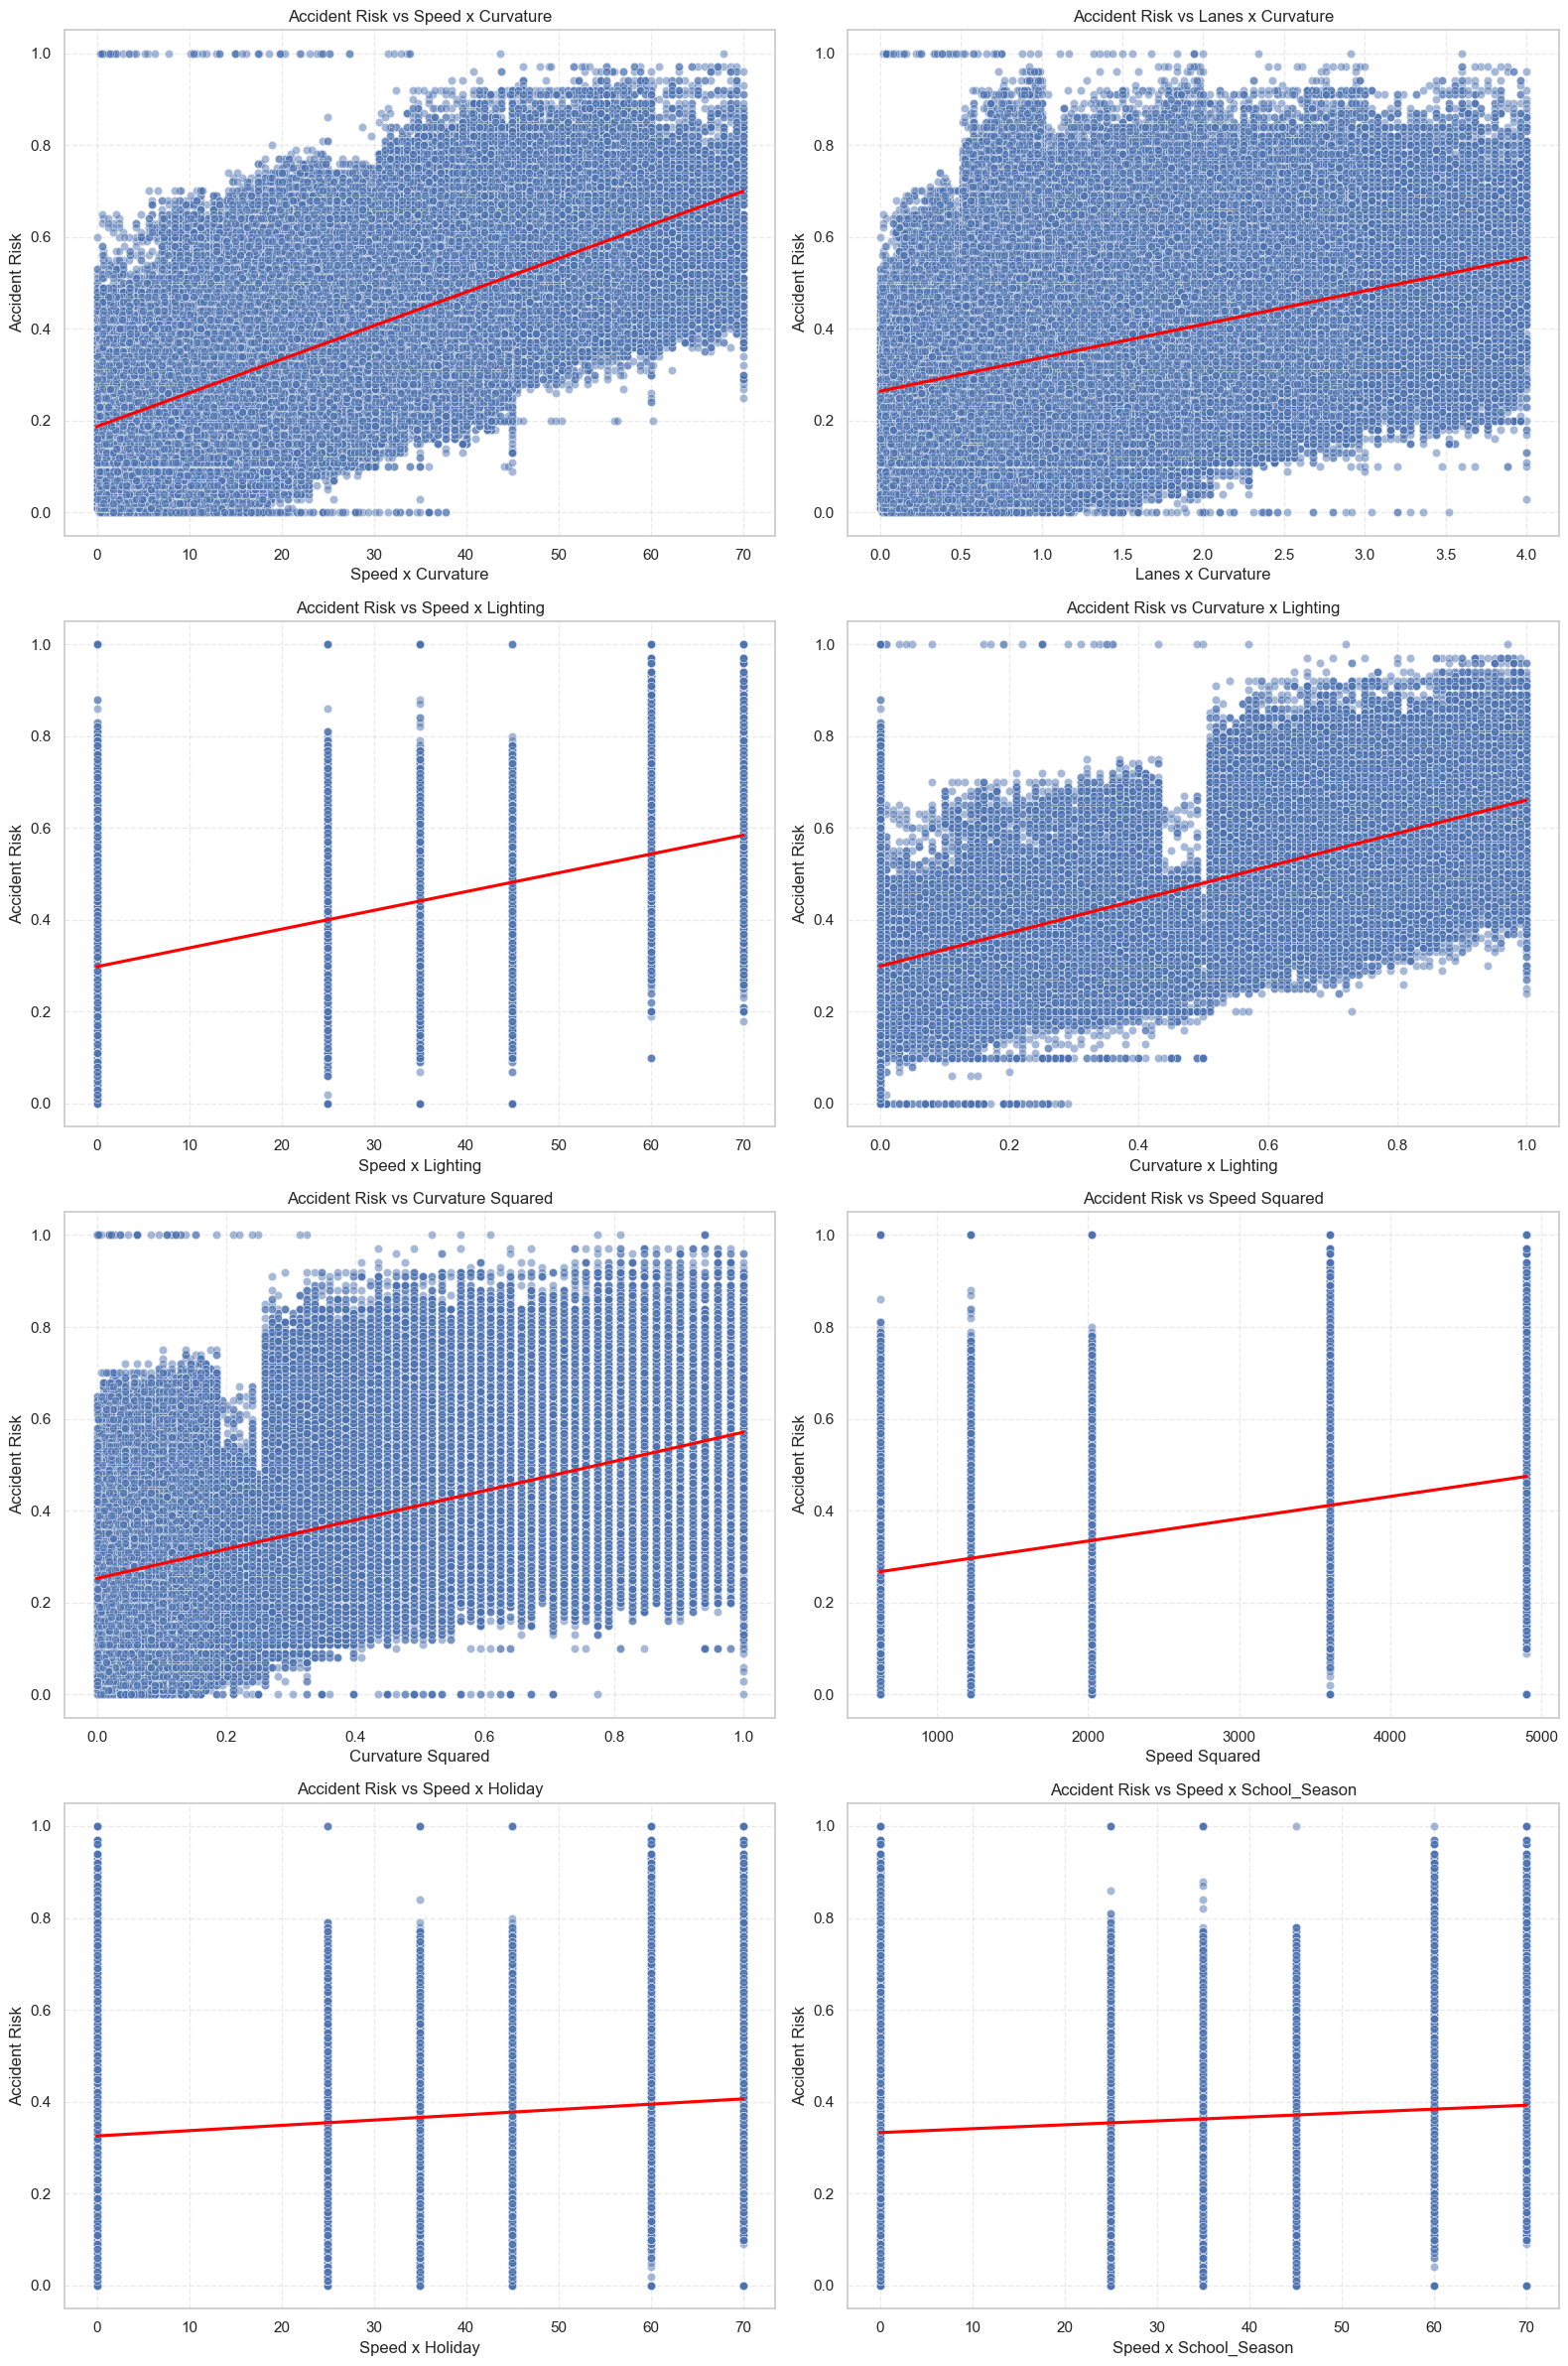

In [ ]:

combined_features = {
    'Speed x Curvature': train['speed_limit'] * train['curvature'],
    'Lanes x Curvature': train['num_lanes'] * train['curvature'],
    'Speed x Lighting': train['speed_limit'] * train['lighting_encoded'],
    'Curvature x Lighting': train['curvature'] * train['lighting_encoded'],
    'Curvature Squared': train['curvature'] ** 2,
    'Speed Squared': train['speed_limit'] ** 2,
    'Speed x Holiday': train['speed_limit'] * train['holiday'],
    'Speed x School_Season': train['speed_limit'] * train['school_season'],

}

features = combined_features
n_features = len(features)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)

plt.figure(figsize=(16, 6*n_rows))

for i, (name, feature) in enumerate(features.items(), 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(x=feature, y=train['accident_risk'], alpha=0.5)
    sns.regplot(x=feature, y=train['accident_risk'], scatter=False, color='red')
    plt.title(f"Accident Risk vs {name}")
    plt.xlabel(name)
    plt.ylabel("Accident Risk")
    plt.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

**Create interaction & derived features based on plots analysis**

In [ ]:
for df in [train, test]:
    df['speed_curvature'] = df['speed_limit'] * df['curvature']
    df['lanes_curvature'] = df['num_lanes'] * df['curvature']
    df['speed_lighting'] = df['speed_limit'] * df['lighting_encoded']
    df['curvature_lighting'] = df['curvature'] * df['lighting_encoded']
    df['high_speed_curve'] = ((df['speed_limit'] >= 60) & (df['curvature'] > 0.5)).astype(int)
    df['curvature_squared'] = df['curvature'] ** 2
    df['speed_squared'] = df['speed_limit'] ** 2
    df['bad_conditions'] = (((df.get('weather_rainy',0) == 1) | (df.get('weather_foggy',0) == 1)) & (df['lighting_encoded'] == 1)).astype(int)

for col in train.columns:
    if col not in test.columns and col != 'accident_risk':
        test[col] = 0

In [ ]:
test.head()

num_lanes  curvature  speed_limit  lighting  road_signs_present  \
0          2       0.34           45     night                   1   
1          3       0.04           45       dim                   1   
2          2       0.59           35       dim                   1   
3          4       0.95           35  daylight                   0   
4          2       0.86           35  daylight                   1   

   public_road  holiday  school_season  num_reported_accidents  base_risk  \
0            1        1              1                       1      0.302   
1            0        1              0                       0      0.112   
2            0        1              1                       1      0.177   
3            0        0              0                       2      0.385   
4            0        0              1                       3      0.358   

   ...  lighting_encoded  speed_curvature  lanes_curvature  speed_lighting  \
0  ...                 1            15.30             0.68              45   
1  ...                 0             1.80             0.12               0   
2  ...                 0            20.65             1.18               0   
3  ...                 0            33.25             3.80               0   
4  ...                 0            30.10             1.72               0   

   curvature_lighting  high_speed_curve  curvature_squared  speed_squared  \
0                0.34                 0             0.1156           2025   
1                0.00                 0             0.0016           2025   
2                0.00                 0             0.3481           1225   
3                0.00                 0             0.9025           1225   
4                0.00                 0             0.7396           1225   

   bad_conditions  curvature_bin  
0               0              0  
1               0              0  
2               0              0  
3               0              0  
4               0              0  

[5 rows x 29 columns]

**check and remove duplicates**

In [ ]:
num_duplicates = train.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 656


In [ ]:
train = train.drop_duplicates()

# 🧹🗂️💻DATA PREPARATION FOR MACHINE LEARNING

**Train XGBoost model**

In [ ]:
# Define variables

target = 'accident_risk'

X = train.drop(columns=[target,'lighting', 'curvature_bin'], errors='ignore')
y = train[target]


# Using train_test_split to divide the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


test_df = test.drop(columns=['lighting', 'curvature_bin'], errors='ignore')
test_df = test_df[X.columns]

# 🤖MACHINE LEARNING MODEL

In [ ]:
#specify the parameters

dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)

# Defining parameters for cross validation
xgb_params = {
    'tree_method': 'hist',
    'device': 'cuda',
    'eval_metric': 'rmse',
    'random_state': 42,
    'max_bin': 512,
    'min_child_weight': 3,
    'max_delta_step': 1,
    'max_depth': 11,
    'learning_rate': 0.011,
    'subsample': 0.82,
    'colsample_bytree': 0.81,
    'gamma': 0.011,
    'reg_alpha': 0.12,
    'reg_lambda': 0.4,
    'colsample_bylevel': 0.86,
    'colsample_bynode': 0.88,
    'scale_pos_weight': 1.0
}

# Using Cross validation to find the best parameters
cv_results = xgb.cv(
    params=xgb_params,
    dtrain=dtrain,
    nfold=7,
    num_boost_round=5000,
    metrics='rmse',
    early_stopping_rounds=100,
    verbose_eval=100
)

# The number of CV results
best_round = len(cv_results)
print(f"Best boosting rounds: {best_round}")

# Adding best_round as a column to xgb_params
xgb_params['n_estimators'] = best_round


c:\Users\bello\anaconda3\Lib\site-packages\xgboost\training.py:225: UserWarning: [13:39:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\context.cc:53: No visible GPU is found, setting device to CPU.
  return getattr(self.bst, name)(*args, **kwargs)
c:\Users\bello\anaconda3\Lib\site-packages\xgboost\training.py:225: UserWarning: [13:39:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\context.cc:207: Device is changed from GPU to CPU as we couldn't find any available GPU on the system.
  return getattr(self.bst, name)(*args, **kwargs)
c:\Users\bello\anaconda3\Lib\site-packages\xgboost\training.py:231: UserWarning: [13:39:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\context.cc:53: No visible GPU is found, setting device to CPU.
  self.bst.update(self.dtrain, iteration, fobj)
c:\Users\bello\anaconda3\Lib\site-packages\xgboost\training.py:231: UserWarning: [13:39:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\context.cc:207: Device is changed from GPU 

[0]	train-rmse:0.16483+0.00010	test-rmse:0.16483+0.00060
[100]	train-rmse:0.07588+0.00003	test-rmse:0.07619+0.00026
[200]	train-rmse:0.05802+0.00001	test-rmse:0.05867+0.00017
[300]	train-rmse:0.05552+0.00002	test-rmse:0.05636+0.00015
[400]	train-rmse:0.05516+0.00002	test-rmse:0.05608+0.00015
[500]	train-rmse:0.05508+0.00002	test-rmse:0.05604+0.00015
[600]	train-rmse:0.05505+0.00002	test-rmse:0.05604+0.00015
[700]	train-rmse:0.05504+0.00002	test-rmse:0.05604+0.00015
[800]	train-rmse:0.05503+0.00002	test-rmse:0.05604+0.00015
[900]	train-rmse:0.05503+0.00002	test-rmse:0.05604+0.00015
[983]	train-rmse:0.05503+0.00002	test-rmse:0.05604+0.00015
Best boosting rounds: 885


In [ ]:
# Fitting the X_train and y_train datasets into the model
model = XGBRegressor(**xgb_params, enable_categorical=True)
model.fit(X_train, y_train)

c:\Users\bello\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:44:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\context.cc:53: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\bello\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:44:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\context.cc:207: Device is changed from GPU to CPU as we couldn't find any available GPU on the system.
  bst.update(dtrain, iteration=i, fobj=obj)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.86, colsample_bynode=0.88,
             colsample_bytree=0.81, device='cuda', early_stopping_rounds=None,
             enable_categorical=True, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=0.011, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.011, max_bin=512, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=1, max_depth=11,
             max_leaves=None, min_child_weight=3, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=885,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Making Predictions on the X_test
y_test_pred = model.predict(X_test)


In [ ]:
# Viewing the predictions
y_test_pred

array([0.14833777, 0.30267227, 0.32215363, ..., 0.3644149 , 0.2234994 ,
       0.4679893 ], dtype=float32)

In [ ]:
# Combining the origina and predicted values into a dataframe

combined_preds = pd.DataFrame({'original_value':y_test,
                               'predicted_value':y_test_pred})

combined_preds.head(10)

original_value  predicted_value
239824            0.18         0.148338
444393            0.21         0.302672
248343            0.31         0.322154
271623            0.19         0.112471
423072            0.13         0.111633
438014            0.43         0.411868
58152             0.30         0.280157
229874            0.38         0.311515
133950            0.31         0.278281
354878            0.23         0.248658

In [ ]:
# Find the root mean squared error
rf_rmse = root_mean_squared_error(y_test, y_test_pred)

# Print the value of the error
print(f'The root mean squared error is: {rf_rmse:.4f}')

The root mean squared error is: 0.0559


# 🧠PREDCITION ON TEST DATA

In [ ]:
# Predict the outcome of the test data set
predictions_df = model.predict(test_df)

# 💾SAVE PREDICTIONS IN CSV

In [ ]:
# converting the final predictions into a DataFrame
submission = pd.DataFrame({'id': test_ids, 'accident_risk': predictions_df})

# saving as file with the name
submission.to_csv('submission.csv', index=False)

# Print a message to show that saving the file was successful
print("Submission saved successfully")

Submission saved successfully


# 💾 SAVE THE MODEL

In [ ]:
# import library to save the model
import joblib

In [ ]:
# save the model
joblib.dump(model, "road_accident_model.pkl")

['road_accident_model.pkl']

In [ ]:
# save the columns in the model
joblib.dump(X_train.columns, 'road_columns.pkl')

['road_columns.pkl']

In [ ]:
X_test

num_lanes  curvature  speed_limit  road_signs_present  public_road  \
239824          2       0.14           45                   1            1   
444393          3       0.06           60                   1            1   
248343          4       0.73           25                   0            0   
271623          2       0.32           25                   0            0   
423072          4       0.38           45                   1            0   
...           ...        ...          ...                 ...          ...   
509632          1       0.12           60                   0            0   
290327          2       0.59           25                   1            0   
26818           4       1.00           45                   0            1   
276310          4       0.40           25                   1            0   
130875          3       0.52           70                   1            1   

        holiday  school_season  num_reported_accidents  base_risk  \
239824        0              1                       1      0.142   
444393        0              0                       2      0.318   
248343        1              1                       2      0.319   
271623        1              1                       1      0.096   
423072        0              0                       1      0.114   
...         ...            ...                     ...        ...   
509632        0              0                       1      0.336   
290327        1              1                       0      0.277   
26818         0              1                       0      0.400   
276310        1              1                       1      0.220   
130875        1              1                       1      0.456   

        weather_clear  ...  time_of_day_morning  lighting_encoded  \
239824          False  ...                 True                 0   
444393          False  ...                 True                 0   
248343          False  ...                 True                 0   
271623           True  ...                 True                 0   
423072           True  ...                False                 0   
...               ...  ...                  ...               ...   
509632          False  ...                False                 0   
290327          False  ...                 True                 0   
26818           False  ...                False                 0   
276310          False  ...                False                 0   
130875          False  ...                 True                 0   

        speed_curvature  lanes_curvature  speed_lighting  curvature_lighting  \
239824             6.30             0.28               0                 0.0   
444393             3.60             0.18               0                 0.0   
248343            18.25             2.92               0                 0.0   
271623             8.00             0.64               0                 0.0   
423072            17.10             1.52               0                 0.0   
...                 ...              ...             ...                 ...   
509632             7.20             0.12               0                 0.0   
290327            14.75             1.18               0                 0.0   
26818             45.00             4.00               0                 0.0   
276310            10.00             1.60               0                 0.0   
130875            36.40             1.56               0                 0.0   

        high_speed_curve  curvature_squared  speed_squared  bad_conditions  
239824                 0             0.0196           2025               0  
444393                 0             0.0036           3600               0  
248343                 0             0.5329            625               0  
271623                 0             0.1024            625               0  
423072                 0             0.1444           2025         